In [1]:
import sys
import numpy
import matplotlib
import pandas
import sklearn

In [39]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
#from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
#loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id','clump_thickness','uniform_cel_size','uniform_cell_shape',
        'marginal_adhesion','single_epithelial_size','bare_nuclei',
        'bland_chromatin','normal_mucleoli','mitoses','class']
df = pandas.read_csv(url, names=names)

In [18]:
#preprocess the data
df.replace('?', -99999, inplace=True)
print(df.axes)

df.drop(['id'], 1, inplace=True)

#print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cel_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_mucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


C:\Users\Moumita Chowdhury\AppData\Local\Temp/ipykernel_16440/2625259629.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['id'], 1, inplace=True)


In [21]:
# Do dataset visualization
print(df.loc[6])
print(df.describe())

clump_thickness            1
uniform_cel_size           1
uniform_cell_shape         1
marginal_adhesion          1
single_epithelial_size     2
bare_nuclei               10
bland_chromatin            3
normal_mucleoli            1
mitoses                    1
class                      2
Name: 6, dtype: object
       clump_thickness  uniform_cel_size  uniform_cell_shape  \
count       699.000000        699.000000          699.000000   
mean          4.417740          3.134478            3.207439   
std           2.815741          3.051459            2.971913   
min           1.000000          1.000000            1.000000   
25%           2.000000          1.000000            1.000000   
50%           4.000000          1.000000            1.000000   
75%           6.000000          5.000000            5.000000   
max          10.000000         10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699

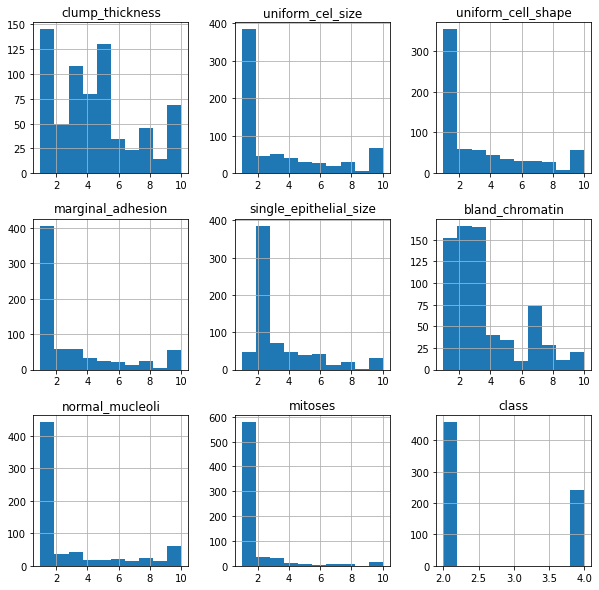

In [23]:
# Plot histograms for each variable
df.hist(figsize = (10,10))
matplotlib.pyplot.show()

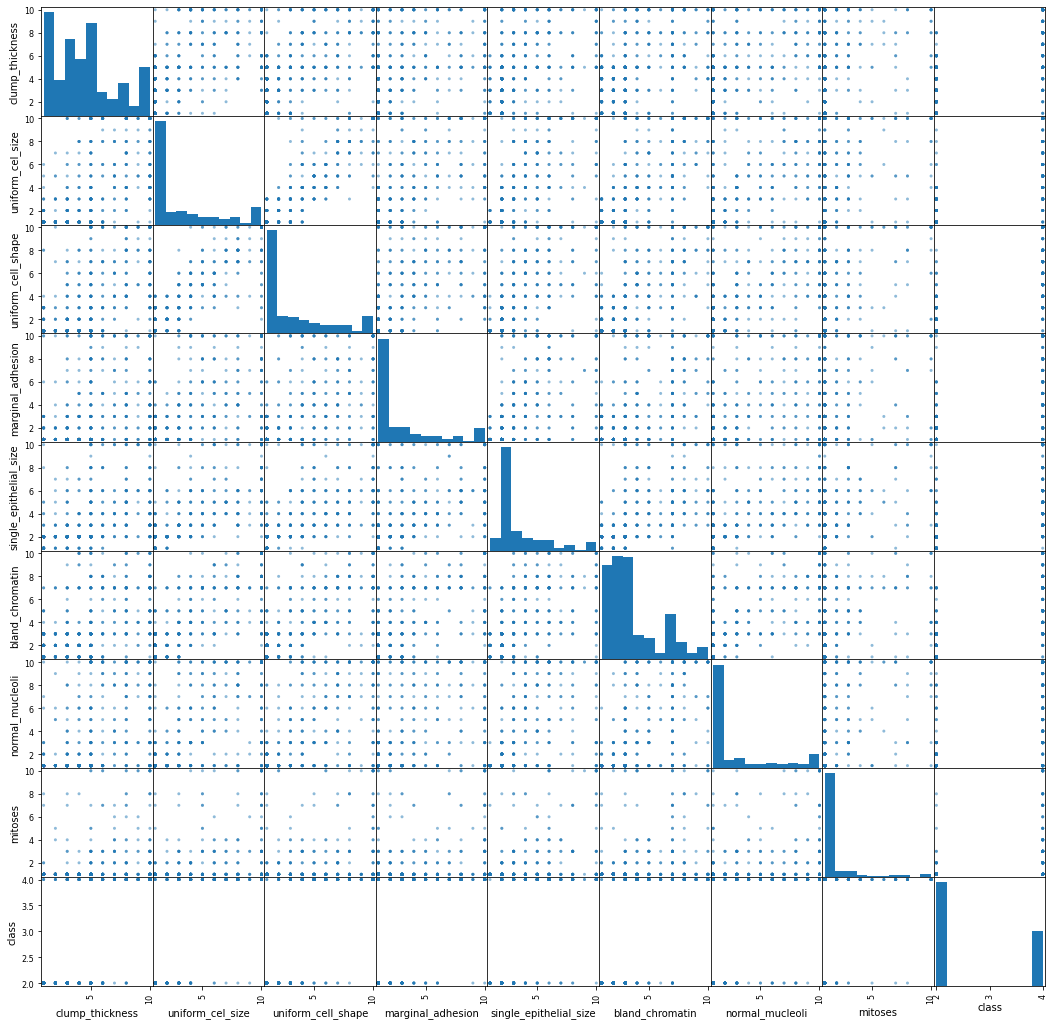

In [25]:
#create scater plot matrix
pandas.plotting.scatter_matrix(df, figsize = (18, 18))
matplotlib.pyplot.show()

In [42]:
x = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

C:\Users\Moumita Chowdhury\AppData\Local\Temp/ipykernel_16440/2759573603.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df.drop(['class'], 1))


In [51]:
seed = 8
scoring = 'accuracy'

In [54]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM',SVC()))

results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.982143 (0.022588)
SVM: 0.647630 (0.047610)


In [57]:
for name, model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9357142857142857
              precision    recall  f1-score   support

           2       0.95      0.96      0.95        96
           4       0.91      0.89      0.90        44

    accuracy                           0.94       140
   macro avg       0.93      0.92      0.92       140
weighted avg       0.94      0.94      0.94       140

SVM
0.6857142857142857
              precision    recall  f1-score   support

           2       0.69      1.00      0.81        96
           4       0.00      0.00      0.00        44

    accuracy                           0.69       140
   macro avg       0.34      0.50      0.41       140
weighted avg       0.47      0.69      0.56       140



C:\Users\Moumita Chowdhury\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Moumita Chowdhury\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Moumita Chowdhury\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
clf = SVC()

clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,5]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

0.6857142857142857
[2]
